In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Research Question 1
### What is the number and proportion of GitHub repositories that are using GitHub Actions workflows, categorized by their main programming language?

In [2]:
## The first dataset we will use contains information about GitHub repositories that make use of GitHub Actions workflows.

df_repositories = pd.read_csv('../datasets/repositories.csv')
df_repositories

,repository,branch,language,created,updated,commit,stars,watchers,forks,size,branches,commits,contributors,issues,prs
0,00-evan/shattered-pixel-dungeon,master,Java,2014-07-31 21:56:31,2022-01-13 23:41:31,5d1a2dce6b554b40f6737ead45d411fd98f4c67d,1803,83,580,69470,1,5165,2.0,859.0,33.0
1,0015/ideasnprojects,master,C++,2019-07-04 08:16:56,2021-03-10 05:31:05,bd09568e05e2790ce3f72905995e763600ff3903,332,39,253,1315,1,144,2.0,11.0,7.0
2,0015/thatproject,master,C,2019-07-04 08:16:56,2021-12-16 20:49:19,69c85b76c285e9b532b2237fbd4244fd6e7e7820,629,68,447,2160,5,208,2.0,0.0,13.0
3,007gzs/dingtalk-sdk,master,Python,2018-05-07 09:42:31,2021-06-03 12:49:51,7979da2e259fdbc571728cae2425a04dbc65850a,148,14,48,944,1,131,7.0,38.0,13.0
4,007gzs/meeting,master,Python,2019-07-02 09:14:00,2021-04-13 05:49:08,a1bea997e2849c03e2a3cfa724d036b6769e1abb,167,6,61,1051,2,104,2.0,17.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69142,zzzprojects/sqlfiddle,master,JavaScript,2012-01-18 08:25:59,2021-04-12 19:20:03,b0014899c1701e017bd87f826e8e369d163ef574,272,29,53,18666,9,530,3.0,76.0,4.0
69143,zzzprojects/sqlfiddle2,master,JavaScript,2014-04-20 22:44:28,2021-04-12 19:20:50,eb6694a8d8f4fcdda82b88bb0f426eb978c304e5,192,17,39,2035,2,192,2.0,32.0,3.0
69144,zzzprojects/sqlfiddle3,master,JavaScript,2016-12-26 19:27:27,2021-04-12 19:27:04,d4283d80b161ede014e49ee177e7d98098f6d583,245,16,44,1717,2,196,3.0,13.0,6.0
69145,zzzprojects/z.extensionmethods,master,C#,2015-03-03 14:49:23,2021-04-06 14:42:44,bdbec3f0924a01e9f638f1ec3c975bd9ff13beb0,844,95,214,6590,1,127,3.0,19.0,14.0


### Requirements : 
#### 1-First, preprocess the dataset by filtering on repositories with at least 100 stars AND more than 1 contributors
#### 2-Quantify the number of repositories, grouped by language
    Hint: Use the groupby operation from pandas. See https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html
#### 3-Quantify the proportion of repositories per language
    Hint: proportion per langage = number of repositories per language / total number of repositories

In [3]:
filtered_repos = df_repositories[(df_repositories.contributors >= 1) & (df_repositories.stars >= 100)]
filtered_repos

,repository,branch,language,created,updated,commit,stars,watchers,forks,size,branches,commits,contributors,issues,prs
0,00-evan/shattered-pixel-dungeon,master,Java,2014-07-31 21:56:31,2022-01-13 23:41:31,5d1a2dce6b554b40f6737ead45d411fd98f4c67d,1803,83,580,69470,1,5165,2.0,859.0,33.0
1,0015/ideasnprojects,master,C++,2019-07-04 08:16:56,2021-03-10 05:31:05,bd09568e05e2790ce3f72905995e763600ff3903,332,39,253,1315,1,144,2.0,11.0,7.0
2,0015/thatproject,master,C,2019-07-04 08:16:56,2021-12-16 20:49:19,69c85b76c285e9b532b2237fbd4244fd6e7e7820,629,68,447,2160,5,208,2.0,0.0,13.0
3,007gzs/dingtalk-sdk,master,Python,2018-05-07 09:42:31,2021-06-03 12:49:51,7979da2e259fdbc571728cae2425a04dbc65850a,148,14,48,944,1,131,7.0,38.0,13.0
4,007gzs/meeting,master,Python,2019-07-02 09:14:00,2021-04-13 05:49:08,a1bea997e2849c03e2a3cfa724d036b6769e1abb,167,6,61,1051,2,104,2.0,17.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69142,zzzprojects/sqlfiddle,master,JavaScript,2012-01-18 08:25:59,2021-04-12 19:20:03,b0014899c1701e017bd87f826e8e369d163ef574,272,29,53,18666,9,530,3.0,76.0,4.0
69143,zzzprojects/sqlfiddle2,master,JavaScript,2014-04-20 22:44:28,2021-04-12 19:20:50,eb6694a8d8f4fcdda82b88bb0f426eb978c304e5,192,17,39,2035,2,192,2.0,32.0,3.0
69144,zzzprojects/sqlfiddle3,master,JavaScript,2016-12-26 19:27:27,2021-04-12 19:27:04,d4283d80b161ede014e49ee177e7d98098f6d583,245,16,44,1717,2,196,3.0,13.0,6.0
69145,zzzprojects/z.extensionmethods,master,C#,2015-03-03 14:49:23,2021-04-06 14:42:44,bdbec3f0924a01e9f638f1ec3c975bd9ff13beb0,844,95,214,6590,1,127,3.0,19.0,14.0


In [4]:
languages_count = filtered_repos.groupby(['language'])['language'].count()
languages_count

language
C               4263
C#              3604
C++             5677
Go              4987
Java            6065
JavaScript     13476
Kotlin          1140
Objective-C      680
PHP             4004
Python         12250
Ruby            2598
Shell           2325
Smalltalk         10
Swift           1398
TypeScript      6339
Name: language, dtype: int64

In [5]:
prop_per_lang = languages_count/languages_count.sum()
prop_per_lang

language
C              0.061948
C#             0.052372
C++            0.082495
Go             0.072469
Java           0.088134
JavaScript     0.195827
Kotlin         0.016566
Objective-C    0.009881
PHP            0.058184
Python         0.178011
Ruby           0.037753
Shell          0.033786
Smalltalk      0.000145
Swift          0.020315
TypeScript     0.092115
Name: language, dtype: float64

## Research Question 2
### What are the top 10 most frequent events that trigger workflows, and what is the proportion of workflows using them?

In [6]:
## The second dataset we will use contains information about GitHub workflows, each reposity may define one or more workflows.

df_workflows = pd.read_csv('../datasets/workflows.csv')
df_workflows

,repository,filename,name,events,jobs
0,0101/pipetools,tests.yml,Tests,"push, pull_request",2
1,0101/pipetools,publish_docs.yml,Publish docs,push,1
2,05bit/peewee-async,ci.yml,CI,"push, pull_request",1
3,07akioni/css-render,nodejs.yml,Node.js CI,"push, pull_request",1
4,0b01001001/spectree,pythonpackage.yml,Python package,"pull_request, push",2
...,...,...,...,...,...
70273,zzzeek/alembic,run-on-pr.yaml,Run tests on a pr,pull_request,2
70274,zzzeek/sqlalchemy,run-test.yaml,Run tests,push,4
70275,zzzeek/sqlalchemy,run-on-pr.yaml,Run tests on a pr,pull_request,3
70276,zzzeek/sqlalchemy,create-wheels.yaml,Create wheel,release,3


### Requirements : 
#### 1-Split the events column (containig the triggers) and explode it 
    Hint: For the split function, see https://www.geeksforgeeks.org/python-string-split/
    For the explode function, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.explode.html
#### 2-Quantify the number of workflows grouped by event
#### 3-Quantify the proportion of workflows grouped by event
    Hint: proportion per event = number of workflows per event / total number of workflows
#### 4-Sort all events in decreasing order of proportion
#### 5-Using the order of step 4, quantify the cumulative proportion of workflows
    Hint: The cumulative proportion is calculated by dividing the cumulative frequency by the total frequency.
    See, for example, https://www.geeksforgeeks.org/cumulative-percentage-of-a-column-in-pandas-python/

In [7]:
new_df_workflows = df_workflows
new_df_workflows['events']=new_df_workflows['events'].str.split(", ") #the space after the comma is important, otherwise we
#would have problems if we have an event [push, pull_request] and an event [pull_request] (it would consider that the
#pull_requests are not the same event)
new_df_workflows

,repository,filename,name,events,jobs
0,0101/pipetools,tests.yml,Tests,"[push, pull_request]",2
1,0101/pipetools,publish_docs.yml,Publish docs,[push],1
2,05bit/peewee-async,ci.yml,CI,"[push, pull_request]",1
3,07akioni/css-render,nodejs.yml,Node.js CI,"[push, pull_request]",1
4,0b01001001/spectree,pythonpackage.yml,Python package,"[pull_request, push]",2
...,...,...,...,...,...
70273,zzzeek/alembic,run-on-pr.yaml,Run tests on a pr,[pull_request],2
70274,zzzeek/sqlalchemy,run-test.yaml,Run tests,[push],4
70275,zzzeek/sqlalchemy,run-on-pr.yaml,Run tests on a pr,[pull_request],3
70276,zzzeek/sqlalchemy,create-wheels.yaml,Create wheel,[release],3


In [8]:
new_df_workflows = new_df_workflows.explode('events')
new_df_workflows

,repository,filename,name,events,jobs
0,0101/pipetools,tests.yml,Tests,push,2
0,0101/pipetools,tests.yml,Tests,pull_request,2
1,0101/pipetools,publish_docs.yml,Publish docs,push,1
2,05bit/peewee-async,ci.yml,CI,push,1
2,05bit/peewee-async,ci.yml,CI,pull_request,1
...,...,...,...,...,...
70274,zzzeek/sqlalchemy,run-test.yaml,Run tests,push,4
70275,zzzeek/sqlalchemy,run-on-pr.yaml,Run tests on a pr,pull_request,3
70276,zzzeek/sqlalchemy,create-wheels.yaml,Create wheel,release,3
70277,zzzm/hostsx,main.yml,Deploy,push,1


In [9]:
events_count = new_df_workflows.groupby(['events'])['events'].count()
events_count

events
branch_protection_rule            12
check_run                         15
check_suite                       42
create                           305
delete                            48
deployment                        17
deployment_status                  9
discussion                         9
discussion_comment                 1
fork                               4
gollum                             7
issue_comment                    676
issues                          1134
label                             12
milestone                         82
page_build                        18
paths                              2
project                            2
project_card                      12
project_column                     2
public                             2
pull_request                   41204
pull_request_review              104
pull_request_review_comment       23
pull_request_target             1436
push                           51223
registry_package               

In [10]:
prop_by_event = events_count/events_count.sum()
prop_by_event=prop_by_event.sort_values(ascending=False)
prop_by_event

events
push                           0.421460
pull_request                   0.339024
workflow_dispatch              0.082683
schedule                       0.079778
release                        0.031209
pull_request_target            0.011815
issues                         0.009330
repository_dispatch            0.006788
issue_comment                  0.005562
workflow_run                   0.004139
create                         0.002510
workflow_call                  0.000930
pull_request_review            0.000856
watch                          0.000815
milestone                      0.000675
status                         0.000453
delete                         0.000395
check_suite                    0.000346
pull_request_review_comment    0.000189
page_build                     0.000148
deployment                     0.000140
check_run                      0.000123
branch_protection_rule         0.000099
label                          0.000099
project_card                   0.

In [11]:
events_count['cum_percent'] = 100*(events_count.cumsum() / events_count.sum())
events_count['cum_percent']

events
branch_protection_rule           0.009874
check_run                        0.022215
check_suite                      0.056773
create                           0.307725
delete                           0.347219
deployment                       0.361207
deployment_status                0.368612
discussion                       0.376017
discussion_comment               0.376840
fork                             0.380131
gollum                           0.385891
issue_comment                    0.942100
issues                           1.875149
label                            1.885023
milestone                        1.952492
page_build                       1.967302
paths                            1.968948
project                          1.970593
project_card                     1.980467
project_column                   1.982112
public                           1.983758
pull_request                    35.886191
pull_request_review             35.971762
pull_request_review_comment

## Research Question 3

The GitHub Actions marketplace classifies all published actions in a predefined set of categories (e.g., api-management, continuous-integration, publishing, utilities)
Each action has a required primary category and an optional secondary category.

### What is the number and proportion of GitHub Actions that can be found in each category?

In [12]:
## The third dataset we will use contains information about GitHub Actions that are published in GitHub marketplace.

df_actions = (
    pd.read_csv('../datasets/actions.csv')
    .assign(category=lambda d:d.apply(lambda s: eval(s.categories), axis=1))
    [['actions','category','stars','open_issues','pull_requests']]
)
df_actions

,actions,category,stars,open_issues,pull_requests
0,protontypes/continuous-reforestation,"[api-management, community]",168.0,4,0.0
1,phillipdupuis/pydantic-to-typescript,"[dependency-management, api-management]",157.0,8,4.0
2,joelwmale/webhook-action,"[monitoring, api-management]",115.0,1,6.0
3,getsentry/action-github-app-token,[api-management],111.0,3,5.0
4,louisbrunner/checks-action,"[api-management, reporting]",96.0,3,1.0
...,...,...,...,...,...
9126,siacodelabs/download-from-skynet,[backup-utilities],1.0,1,0.0
9127,siacodelabs/upload-to-skynet,[backup-utilities],1.0,1,0.0
9128,zcong1993/actions-git-mirror,"[utilities, backup-utilities]",0.0,0,0.0
9129,olizilla/add-to-estuary,"[publishing, backup-utilities]",1.0,0,0.0


### Requirements : 
#### 1-Create a new column that contains the primary category of the action
#### 2-Quantify the number of actions grouped by primary category
#### 3-Quantify the proportion of action grouped by primary category
#### 4-Visualise this proportion by means of a pie chart showing the 5 most frequent categories and collapsing all other categories into "others".
    Hint: For information about pie charts, see https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html and https://stackoverflow.com/questions/48587997/matplotlib-pie-graph-with-all-other-categories

In [13]:
df_actions_primaryCategory = df_actions
df_actions_primaryCategory['Primary category'] = df_actions['category'].str[0]

In [14]:
df_actions_primaryCategory

,actions,category,stars,open_issues,pull_requests,Primary category
0,protontypes/continuous-reforestation,"[api-management, community]",168.0,4,0.0,api-management
1,phillipdupuis/pydantic-to-typescript,"[dependency-management, api-management]",157.0,8,4.0,dependency-management
2,joelwmale/webhook-action,"[monitoring, api-management]",115.0,1,6.0,monitoring
3,getsentry/action-github-app-token,[api-management],111.0,3,5.0,api-management
4,louisbrunner/checks-action,"[api-management, reporting]",96.0,3,1.0,api-management
...,...,...,...,...,...,...
9126,siacodelabs/download-from-skynet,[backup-utilities],1.0,1,0.0,backup-utilities
9127,siacodelabs/upload-to-skynet,[backup-utilities],1.0,1,0.0,backup-utilities
9128,zcong1993/actions-git-mirror,"[utilities, backup-utilities]",0.0,0,0.0,utilities
9129,olizilla/add-to-estuary,"[publishing, backup-utilities]",1.0,0,0.0,publishing


In [15]:
primCat_count = df_actions_primaryCategory.groupby(['Primary category'])['Primary category'].count()
primCat_count

Primary category
ai-assisted                  3
api-management             161
backup-utilities            21
chat                       256
code-quality               451
code-review                765
code-scanning-ready          5
code-search                 10
community                    1
container-ci               268
continuous-integration    2375
dependency-management      391
deployment                1138
desktop-tools               18
game-ci                     19
ides                        30
learning                    74
localization                55
mobile                      68
mobile-ci                   46
monitoring                 191
open-source-management      44
project-management         783
publishing                 468
reporting                   80
security                   595
support                    162
testing                    343
time-tracking               37
utilities                  273
Name: Primary category, dtype: int64

In [26]:
prop_by_primCat = primCat_count/primCat_count.sum()
prop_by_primCat

Primary category
ai-assisted               0.000329
api-management            0.017632
backup-utilities          0.002300
chat                      0.028036
code-quality              0.049392
code-review               0.083781
code-scanning-ready       0.000548
code-search               0.001095
community                 0.000110
container-ci              0.029351
continuous-integration    0.260103
dependency-management     0.042821
deployment                0.124630
desktop-tools             0.001971
game-ci                   0.002081
ides                      0.003286
learning                  0.008104
localization              0.006023
mobile                    0.007447
mobile-ci                 0.005038
monitoring                0.020918
open-source-management    0.004819
project-management        0.085752
publishing                0.051254
reporting                 0.008761
security                  0.065163
support                   0.017742
testing                   0.037564
tim

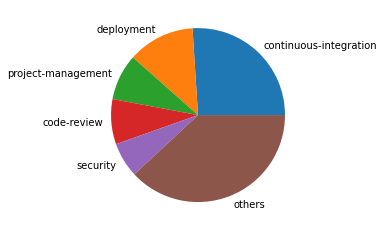

In [31]:
sorted_primCat = prop_by_primCat.sort_values(ascending=False)

top5 = sorted_primCat[:5]
others = sorted_primCat[5:].sum()
top5["others"] = others

plt.pie(top5, labels=top5.index)
plt.show()